In [52]:
import pandas as pd


In [53]:
df = pd.read_csv("Nat_Gas.csv")
df.head(5)

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [54]:
from datetime import datetime

<Axes: xlabel='Dates'>

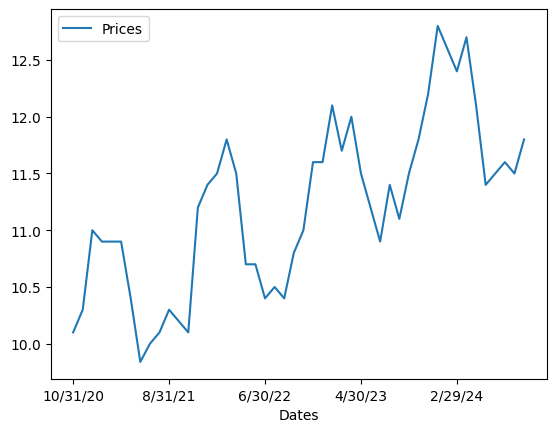

In [55]:
df.plot(x="Dates",y="Prices")

I can see that every winter the price of oil goes up na din the summer it drops again, and the overall price of oil has been going up 

In [58]:
df2=df
df2["Dates"] = pd.to_datetime(df2["Dates"])


/var/folders/sb/3g822kv954s3d7032z9m7ckh0000gn/T/ipykernel_8315/1543450290.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2["Dates"] = pd.to_datetime(df2["Dates"])


<Axes: xlabel='Dates'>

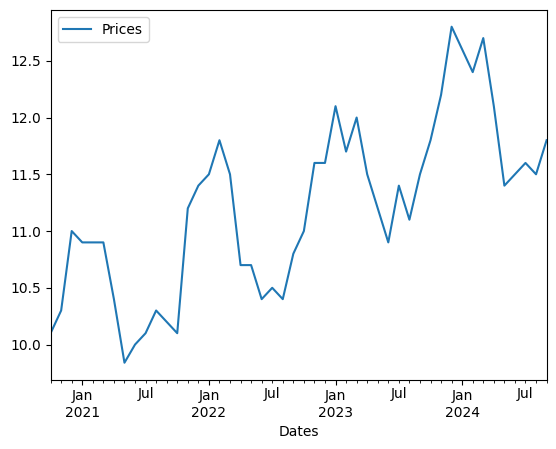

In [60]:
df2.plot(x="Dates",y="Prices")

In [62]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA



In [63]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df['Prices'])
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: 0.218077
p-value: 0.973257


Data is not stationary so cannot use ARIMA and SARIMAX requires a lot of historical data but can attempt it.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

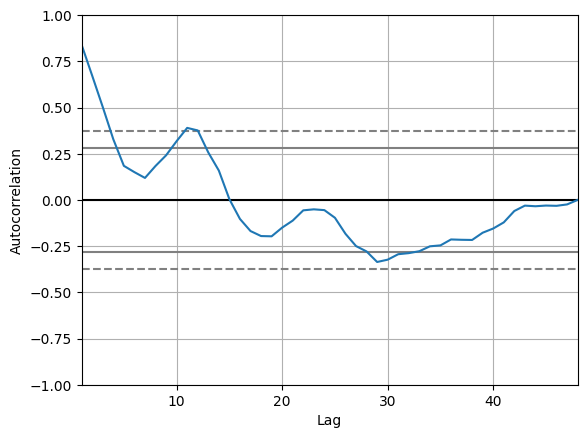

In [64]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['Prices'])

In [ ]:
import matplotlib as plt

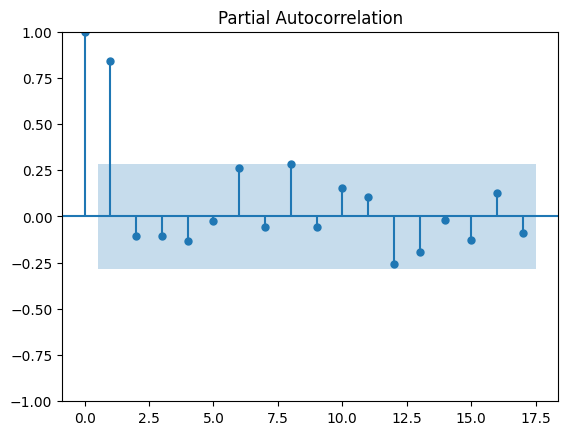

In [65]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df['Prices'])
plt.show()

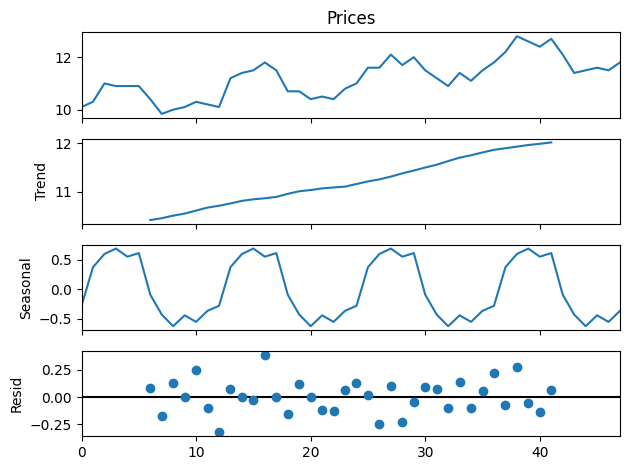

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition=seasonal_decompose(df['Prices'],model='additive',period=12)
decomposition.plot()
plt.show()

In [69]:
import pmdarima as pmd

model=pmd.auto_arima(df['Prices'],start_p=1,start_q=1,test='adf',m=12,seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=41.004, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=112.596, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=40.061, Time=0.13 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=67.869, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=370.421, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=50.065, Time=0.03 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=42.032, Time=0.37 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=41.895, Time=0.19 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=41.078, Time=0.16 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=97.629, Time=0.10 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=40.263, Time=0.14 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=40.312, Time=0.26 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=70.098, Time=0.23 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=43.25

In [70]:
sarima=SARIMAX(df['Prices'],order=(1,0,0),seasonal_order=(1,0,0,12))
predicted=sarima.fit().predict();predicted

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.18084D+02    |proj g|=  2.15022D+03

At iterate    5    f=  2.43579D+00    |proj g|=  2.41056D+00

At iterate   10    f=  6.00983D-01    |proj g|=  5.11727D-01

At iterate   15    f=  5.78108D-01    |proj g|=  1.93014D-01

At iterate   20    f=  4.69803D-01    |proj g|=  4.19869D-01

At iterate   25    f=  4.36249D-01    |proj g|=  9.30710D-02

At iterate   30    f=  4.32439D-01    |proj g|=  6.00379D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


0      0.000000
1     10.093849
2     10.293305
3     10.991363
4     10.891652
5     10.891661
6     10.891671
7     10.393086
8      9.834676
9      9.994239
10    10.093970
11    10.293417
12    10.193714
13    10.189183
14    11.532757
15    11.340502
16    11.489306
17    11.788784
18    11.243991
19    10.415517
20    10.768293
21    10.439513
22    10.588488
23    10.341643
24    10.740863
25    11.529186
26    11.687514
27    11.638621
28    12.235964
29    11.542537
30    11.596444
31    11.489135
32    11.042468
33    10.938985
34    11.340076
35    11.285827
36    11.587347
37    12.083248
38    12.188686
39    13.032958
40    12.392165
41    12.535613
42    12.442843
43    11.941586
44    11.242547
45    11.734621
46    11.442369
47    11.685729
Name: predicted_mean, dtype: float64

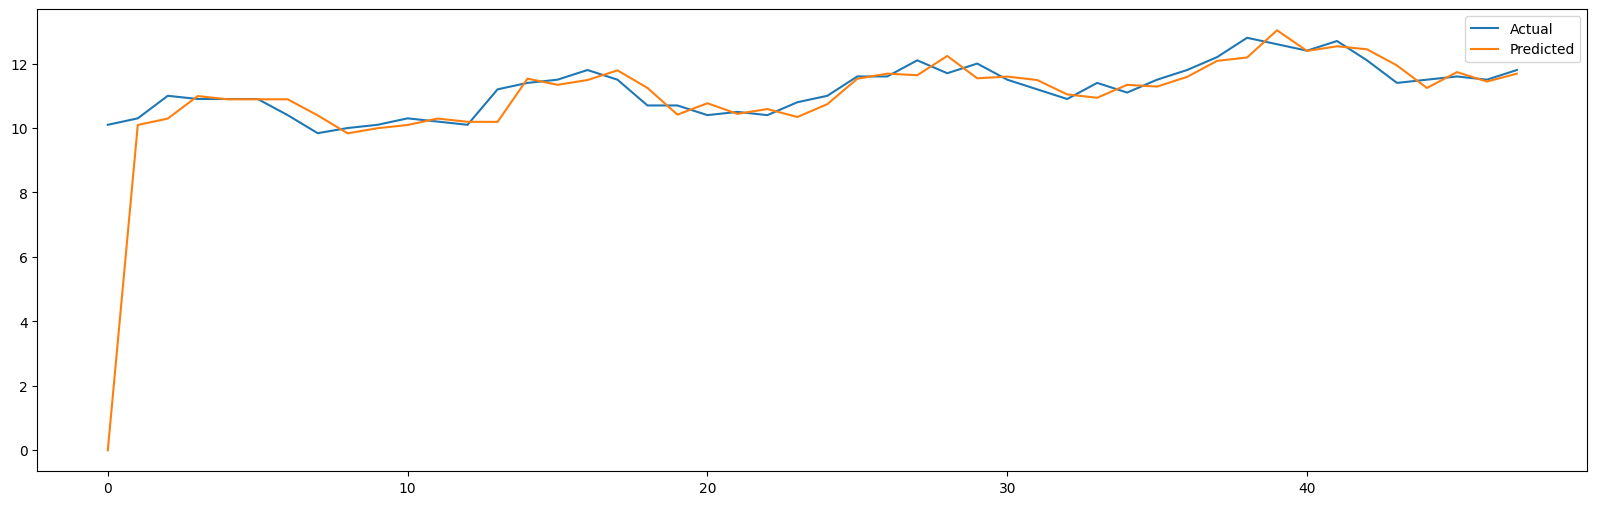

In [72]:
plt.figure(figsize=(20,6))
plt.plot(df['Prices'],label='Actual')
plt.plot(predicted,label='Predicted')
plt.legend()

In [74]:
resid=df['Prices']-predicted;resid
mae=abs(resid.mean());mae

0.24100182521997357

In [75]:
sarima1=SARIMAX(df['Prices'],order=(1,1,1),seasonal_order=(1,0,1,12))
predicted1=sarima1.fit().predict();predicted1

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.86012D-01    |proj g|=  5.29730D-01

At iterate    5    f=  2.70623D-01    |proj g|=  2.24963D-02

At iterate   10    f=  2.46359D-01    |proj g|=  6.10184D-02

At iterate   15    f=  2.41403D-01    |proj g|=  1.69468D-02

At iterate   20    f=  2.37466D-01    |proj g|=  4.98181D-02

At iterate   25    f=  2.31405D-01    |proj g|=  4.96533D-03

At iterate   30    f=  2.29799D-01    |proj g|=  2.65869D-02

At iterate   35    f=  2.29772D-01    |proj g|=  1.75104D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

0      0.000000
1     10.099998
2     10.202635
3     10.535522
4     10.732114
5     10.815674
6     10.857505
7     10.694897
8     10.343023
9     10.153070
10    10.109618
11    10.212112
12     9.954930
13    10.230176
14    11.273838
15    11.305201
16    11.379332
17    11.549938
18    11.144883
19    10.504259
20    10.675129
21    10.677929
22    10.757579
23    10.512294
24    10.657176
25    11.430465
26    11.926940
27    11.815685
28    12.030595
29    11.798009
30    11.248858
31    11.108019
32    11.094391
33    11.119150
34    11.251599
35    11.350099
36    11.506630
37    12.234800
38    12.519608
39    12.778305
40    12.701609
41    12.575790
42    12.036535
43    11.804827
44    11.519484
45    11.700628
46    11.601450
47    11.772100
Name: predicted_mean, dtype: float64

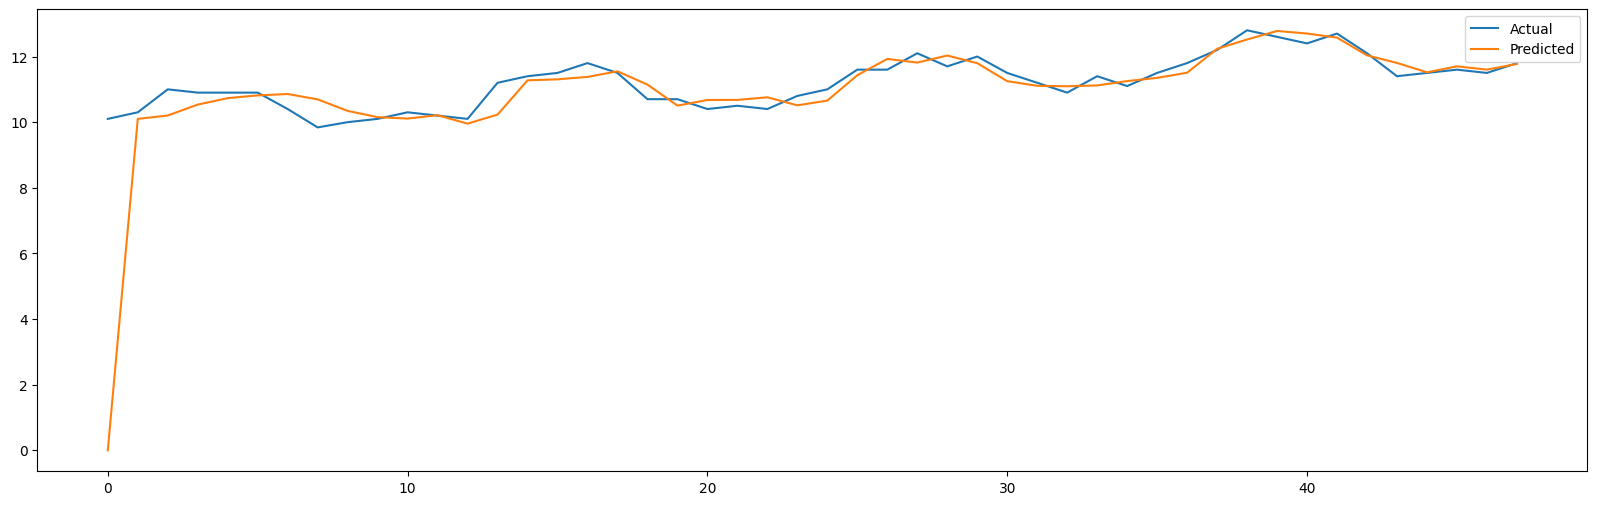

In [76]:
plt.figure(figsize=(20,6))
plt.plot(df['Prices'],label='Actual')
plt.plot(predicted1,label='Predicted')
plt.legend()

In [77]:
model=pmd.auto_arima(df['Prices'],start_p=1,start_q=1,test='adf',m=12,seasonal=True,trace=True)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=41.004, Time=0.58 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=112.596, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=40.061, Time=0.17 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=67.869, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=370.421, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=50.065, Time=0.03 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=42.032, Time=0.24 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=41.895, Time=0.14 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=41.078, Time=0.05 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=97.629, Time=0.38 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=40.263, Time=0.16 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=40.312, Time=0.17 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=70.098, Time=0.10 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=43.25

In [78]:
pred=model.predict(n_periods=12);pred


48    11.886024
49    12.034803
50    12.296495
51    12.151020
52    12.012080
53    12.137973
54    11.801736
55    11.417555
56    11.451598
57    11.488430
58    11.423886
59    11.568784
dtype: float64

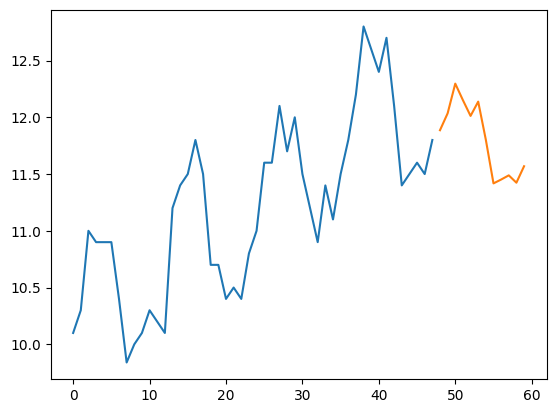

In [79]:
plt.plot(df['Prices'])
plt.plot(pred)

In [88]:
model = SARIMAX(df['Prices'], order=(1,1,1),seasonal_order=(1,0,1,12))
model_fit = model.fit(disp=False)



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [91]:
def predict_price(date_str):
    # Convert the input string to a datetime object
    input_date = pd.to_datetime(date_str, format='%m/%d/%Y')
    
    # Check if the input date is within the range of the dataset
    if input_date <= df.index[-1]:
        print("Date is within the historical data range. Please provide a future date.")
        return None
    
    # Predicting the price
    forecast = model_fit.get_forecast(steps=(input_date - df.index[-1]).days)
    predicted_mean = forecast.predicted_mean
    
    # Extract the prediction for the input date
    predicted_price = predicted_mean[-1]
    return predicted_price


In [93]:
df = pd.read_csv('Nat_Gas.csv', parse_dates=['Dates'], index_col='date', date_parser=lambda x: pd.to_datetime(x, format='%m/%d/%Y'))


/var/folders/sb/3g822kv954s3d7032z9m7ckh0000gn/T/ipykernel_8315/4258932988.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('Nat_Gas.csv', parse_dates=['Dates'], index_col='Dates', date_parser=lambda x: pd.to_datetime(x, format='%m/%d/%Y'))


ValueError: time data "10/31/20" doesn't match format "%m/%d/%Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [92]:
# Example usage
date_input = '12/31/2024'  # User-provided date
predicted_price = predict_price(date_input)

if predicted_price:
    print(f"The predicted price for {date_input} is {predicted_price:.2f}")

TypeError: '<=' not supported between instances of 'Timestamp' and 'int'